<a href="https://colab.research.google.com/github/MatheusSC017/Studies/blob/main/BinaryTreeBuilder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# This script creates a new tree based on an odd list with numbers and the letter "N", where each numeric value in the list indicates the presence of the node, if the value is "N" the node does not exist

In [3]:
from networkx.drawing.nx_pydot import graphviz_layout
import networkx as nx
import matplotlib.pyplot as plt

In [27]:
class Node:
  left_node = None
  right_node = None
  def __init__(self, key):
    self.key = key

class BuildBinaryTree:
  node_values = None
  layer = 0
  pointer = -1
  
  def build_tree(self, structure):
    values = structure.split(' ')
    self.node_values = [(values[i], values[i + 1]) for i in range(1, len(values), 2)]
    self.pointer = -1
    self.layer = 1

    self.root = Node(values[0])
    self.build_layer([self.root, ])
    return self.root

  def build_layer(self, nodes):
    new_nodes = list()
    for node in nodes:
      if node:    
        sub_nodes = self.build_node(node)
        if sub_nodes:
          new_nodes.extend(sub_nodes)
    if any(new_nodes):
      self.build_layer(new_nodes)

  def build_node(self, node):
    self.pointer += 1
    if self.pointer < len(self.node_values):
      sub_node_values = self.node_values[self.pointer]

      if sub_node_values[0] != 'N':
        node.left_node = Node(sub_node_values[0])
        
      if sub_node_values[1] != 'N':
        node.right_node = Node(sub_node_values[1])

      return (node.left_node, node.right_node)

def print_tree(tree):
  def print_node(root, prev=None, color=None):
    if root:
      G.add_node(root.key)
      if prev:
        G.add_edge(prev, root.key, color=color)
      print_node(root.left_node, root.key, '#00FF00')
      print_node(root.right_node, root.key, '#FF0000')
  plt.figure(1, figsize=(20, 8))
  G = nx.Graph()
  print_node(tree)
  pos = graphviz_layout(G, prog='dot')
  colors = [G[u][v]['color'] for u,v in G.edges()]
  nx.draw(G, pos, with_labels=True, node_size=1000, edge_color=colors)
  plt.show()

In [43]:
build_binary_tree = BuildBinaryTree()
binary_tree = build_binary_tree.build_tree('50 22 75 25 N 66 90 N N N 72 88 100 69 74 86 89 95 N')

<ipython-input-27-e8cbff4d9255>:56: DeprecationWarning: nx.nx_pydot.graphviz_layout depends on the pydot package, which hasknown issues and is not actively maintained. Consider usingnx.nx_agraph.graphviz_layout instead.

See https://github.com/networkx/networkx/issues/5723
  pos = graphviz_layout(G, prog='dot')


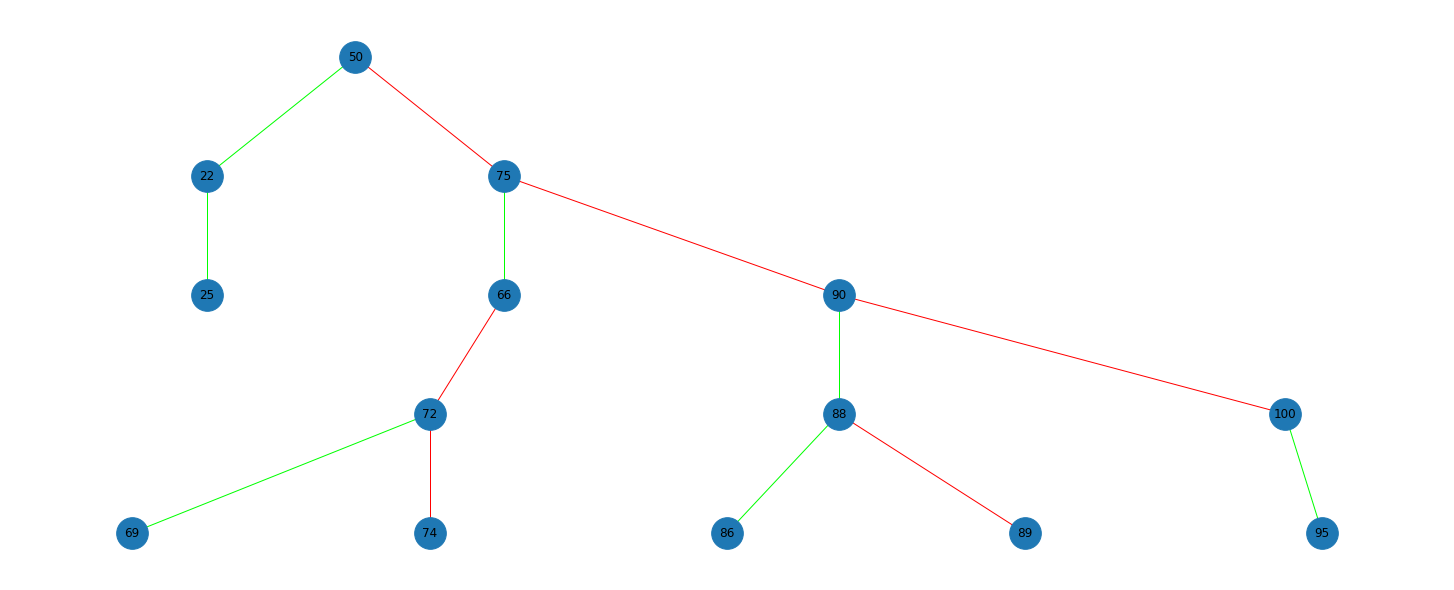

In [44]:
print_tree(binary_tree)